In [1]:
import pandas
import pandas as pd
import numpy as np

## Q1
During the test on central tendencies, the following results were noted in the frequency table:

score 17 18 19 20 21 22 23 24
f 5 6 17 23 32 10 10 7

a. What is the range of this test?
b. What is the value of the interquartile distance?
c. What does this interquartile distance mean?
d. Draw a box plot
e. What's special about this box plot?  Why is this so?
f. What is the standard deviation (4 significant figures)?

In [2]:
#a
score = [17,18,19,20,21,22,23,24]
f = [5,6,17,23,32,10,10,7]
q1 = np.array([score,f])
q1[0].max()-q1[0].min()

7

In [3]:
#b
from scipy import stats
def extend_array(array: np.array):
    long_boy=[]
    for x,f in zip(array[0],array[1]):
        i=0
        while i<f:
            long_boy.append(x)
            i=i+1
    return long_boy
stats.iqr(extend_array(q1))

1.75

c
If you omit the 25% lowest values and the 25% highest values, then the range is equal
to 1.75

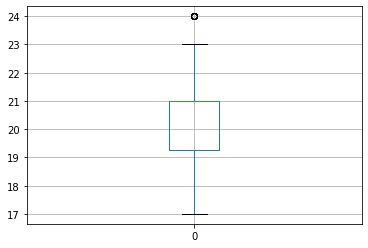

In [4]:
#d
import matplotlib.pyplot as plt
plt.figure()
q1d=pd.DataFrame(data=extend_array(q1))
q1d.boxplot()
plt.show()

#e
The median is equal to the third quartile (21).

In [5]:
#f
q1d.std()
# numpy array doesnt work apparently????
# use dataframe

0    1.714482
dtype: float64

## Q2
The scores of the English class are as follows:

score 22 24 26 30 32 35
f 1 2 4 6 3 4

Answer the following questions with 4 significant digits:

a. What is the mean on the test?
b. What is the variance?
c. What is the standard deviation?
d. What is the z-score for 22?

In [6]:
#a
score = [22,24,26,30,32,35]
f = [1,2,4,6,3,4]
q2 = np.array([score,f])
def np_stats(array: np.array):
    total_frequencies = array[0] * array[1]
    mean = (total_frequencies.sum() / array[1].sum()).round(4)
    mode = array[0][array[1]==array[1].max()]
    median_pos = array[1].sum()/2
    pos_ceil=np.ceil(median_pos)
    pos_floor=np.floor(median_pos)
    all_nums=[]
    for x,f in zip(array[0],array[1]):
        i=0
        while i<f:
            all_nums.append(x)
            i=i+1
    if median_pos%2!=0:
        median = all_nums[int(median_pos)]
    else:
         median = [all_nums[int(pos_floor)],all_nums[int(pos_ceil)]]
    result={'mean':mean,'mode':mode.tolist(),'median':median}
    return result
np_stats(q2)

{'mean': 29.5, 'mode': [30], 'median': [30, 30]}

In [7]:
#b
q2b = pd.DataFrame(data=extend_array(q2))
q2b.var()

0    16.157895
dtype: float64

In [8]:
#c
q2b.std()

0    4.019688
dtype: float64

In [9]:
#d
q2b['zscore']=(q2b - q2b.mean())/q2b.std()
q2b

,0,zscore
0,22,-1.865816
1,24,-1.368265
2,24,-1.368265
3,26,-0.870714
4,26,-0.870714
5,26,-0.870714
6,26,-0.870714
7,30,0.124388
8,30,0.124388
9,30,0.124388


## Q3
For a frequency distribution the mean is equal to 7 and the standard deviation is equal to 2.3.
There appears to be an input error in the scores, a 6 should have been a 5. After recovery, we
recalculate. What do we know about the standard deviation?

a. smaller than 2.3
b. equal to 2.3
c. greater than 2.3 <<<<
d. impossible to know

## Q4
The mean of a variable (X) is 20, the median 18, the variance 6 and the interquartile distance
4. To all scores 10 is added.

a. What is the new mean? x -> x+10
b. What is the new median? x -> 28
c. What is the new variance? x -> x
d. What is the new interquartile distance? x -> x

## Q5
From a frequency distribution, all scores are divided by 4. What do we know about the
standard deviation of these new scores?

a. equal to that of the original score
b. 2x as small as the original score
c. 4x as small as the original score <<<
d. 16x as small as the original score

## Q6
The average age of this class is 20 years old with a standard deviation of 2. Within 20 years
there will be a reunion.  Everyone is still alive and present.
How big is the mean and the standard deviation over 20 years?

1. 40 and 2 years <<<
2. 40 and 4 years
3. 40 and 1 year
4. impossible to know, there are too little data

## Q7
The distribution of scores has a mean of 8 with a standard deviation of 2. We want to transform
the scores in such a way that the mean equals 10 and the standard deviation equals 4. What
should we do with all the scores?

a. multiply by 2
b. increase by 2
c. multiply by 2 and then increase by 2
d. increase by 2 and then multiply by 2
e. multiply by 2 and then reduce by 6 <<<

## Q8
Load the file "UofS_access_log" (see exercises on frequencies).

a. Create a histogram of the number of bytes sent, with a class interval of 10000 bytes.
What do you see?  Why is this?
b. Make a new histogram with all messages up to 13,000 bytes long (with a class interval
of 1000 bytes).  Make sure the left border always belongs to the interval.
c. What is the mode of this?
d. What is the mean number of bytes sent (4 significant figures)?
e. What is the standard deviation of the number of bytes sent?  (4 significant figures)
What does this mean?
f. What are the quartiles of the number of bytes sent?
g. What is the meaning of the third quartile?
h. What is the interquartile distance of the number of bytes sent?  What does this mean?
i. Make a box plot of the number of bytes sent.  How do you interpret this graph?
j. How many outliers are there?  What is the minimum of these outliers?
k. Remove the outliers and make a box plot again (outliers are created here, but look for
an option at box plot not to draw them).

In [10]:
web = pd.read_csv('UofS_access_log_small.csv', header=None, sep=" ", error_bad_lines=False,encoding_errors='ignore', engine='python',decimal='.')
ws = pd.DataFrame({'domain':web[0],'timestamp':web[3],'request':web[5],'response code':web[6],'response length':web[7]})
ws['response length']=ws.loc[:,'response length'].replace(to_replace="-",value=0,limit=None)
ws['response length']=pd.to_numeric(ws['response length'])

ws

D:\school_progs\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 19818: ' ' expected after '"'


,domain,timestamp,request,response code,response length
0,cad49.cadvision.com,[01/Jun/1995:00:53:19,GET /~lowey/webville/icons/blank_32.gif,200,167
1,130.89.250.24,[01/Jun/1995:02:45:12,GET /~lowey/webville/icons/south_32.gif,200,210
2,130.54.25.198,[01/Jun/1995:03:29:56,GET /~macphed/finite/fe_resources/node92.html,200,1668
3,148.81.17.41,[01/Jun/1995:04:02:17,GET /~friesend/tolkien/rootpage.html,200,461
4,anumsun6.univ-st-etienne.fr,[01/Jun/1995:04:40:30,GET /~macphed/finite/fe_resources/node58.html,200,1707
...,...,...,...,...,...
48166,duke.usask.ca,[31/Dec/1995:23:07:50,GET /images/comments_50.gif HTTP/1.0,200,388
48167,sask.usask.ca,[31/Dec/1995:23:16:16,GET / HTTP/1.0,200,3856
48168,144.92.13.6,[31/Dec/1995:23:25:53,GET /~ladd/virginia_pisu.html,200,915
48169,ccc055.canuck.com,[31/Dec/1995:23:32:35,GET /mlookup/white.html HTTP/1.0,200,728


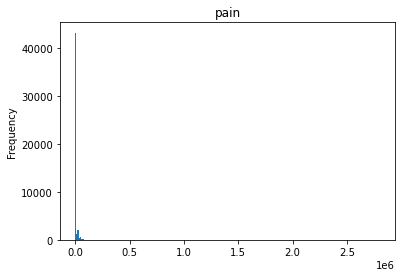

In [11]:
#a
cutpoints = range(0,ws['response length'].max()+1000,10000)
plt.figure()
ws['response length'].plot.hist(title="pain",bins=cutpoints)
plt.show()
#??????

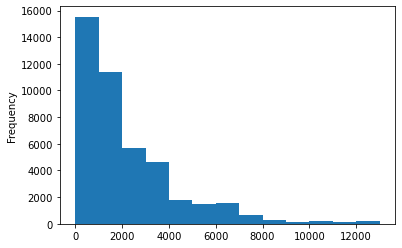

In [12]:
#b
cutpoints = range(0,(ws[ws['response length']<13000]['response length']).max()+1000,1000)
plt.figure()
(ws[ws['response length']<13000]['response length']).plot.hist(bins=cutpoints)
plt.show()

In [13]:
#c
ws_class = pd.cut(ws[ws['response length']<13000]['response length'],bins=cutpoints,include_lowest=True)
ws_class.mode()

0    (-0.001, 1000.0]
Name: response length, dtype: category
Categories (13, interval[float64, right]): [(-0.001, 1000.0] < (1000.0, 2000.0] < (2000.0, 3000.0] < (3000.0, 4000.0] ... (9000.0, 10000.0] < (10000.0, 11000.0] < (11000.0, 12000.0] < (12000.0, 13000.0]]

In [14]:
#d
round(ws['response length'].mean(),2)

5391.91

In [15]:
#e
ws['response length'].std()

21181.997583223805

In [16]:
#f
ws['response length'].quantile(q=(0.25,0.5,0.75))

0.25     461.0
0.50    1714.0
0.75    3442.0
Name: response length, dtype: float64

In [17]:
#g
#75% of the requests have a number of sent bytes smaller than 3455 bytes

In [18]:
#h
stats.iqr(ws['response length'])

2981.0

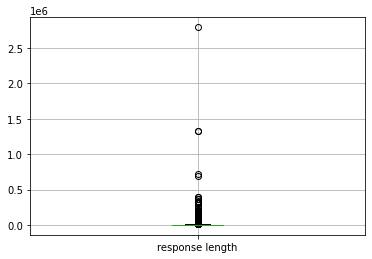

In [19]:
#i
# import matplotlib.pyplot as plt
# plt.figure()
# q1d=pd.DataFrame(data=extend_array(q1))
# q1d.boxplot()
# plt.show()
plt.figure()
pd.DataFrame(ws['response length']).boxplot()
plt.show()

In [20]:
#j
def get_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    I = Q3 - Q1
    low = Q1 - 1.5 * I
    high = Q3 + 1.5 * I
    return data[~data.between(low,high)]
get_outliers(ws['response length']).count()

5457

In [21]:
get_outliers(ws['response length']).min()

7930

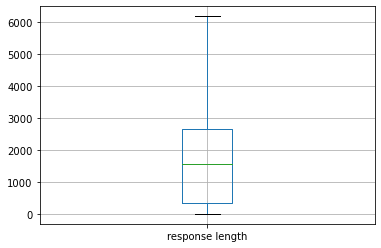

In [23]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    I = Q3 - Q1
    low = Q1 - 1.5 * I
    high = Q3 + 1.5 * I
    return data[data.between(low,high)]
plt.figure()
pd.DataFrame(remove_outliers(ws['response length'])).boxplot(showfliers=False)
plt.show()